In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf
%tensorflow_version
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import os
import numpy as np
import gzip
def load_mnist(path,kind='train'):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, dtype=np.uint8).reshape(len(labels), 28,
        28).astype(np.float64)
    return images, labels

X_train, y_train = load_mnist('/content/drive/My Drive/Colab/my_data/', kind='train')
X_test, y_test = load_mnist('/content/drive/My Drive/Colab/my_data/', kind='t10k')
class_names = ['0','1','2','3','4','5','6','7','8','9']
num_classes = len(class_names)

num_train = len(X_train)
num_test = len(X_test)
X_train = X_train / 255
X_train = X_train.reshape((num_train, 28, 28, 1))
X_test = X_test / 255
X_test = X_test.reshape((num_test, 28, 28, 1))

Currently selected TF version: 1.x
Available versions:
* 1.x
* 2.x


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE = 32
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, y_train, shuffle=True, batch_size=BATCH_SIZE)
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(X_test, y_test, shuffle=False, batch_size=BATCH_SIZE)

In [22]:
model.fit_generator(train_generator, epochs=5, steps_per_epoch=math.ceil(num_train/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2568 - acc: 0.9263
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1135 - acc: 0.9662
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0777 - acc: 0.9765
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - acc: 0.9822
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - acc: 0.9854


In [23]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=math.ceil(num_test/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - acc: 0.9781
Accuracy on test dataset: 0.9781


In [24]:
predictions = model.predict(test_generator)
predictions.shape

(10000, 10)

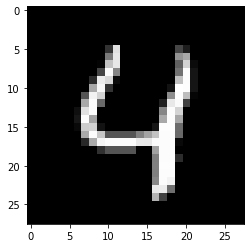

predict: 4
answer: 4


In [41]:
def show(x):
  image = X_test[x]
  pixels = image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()
  print("predict:", np.argmax(predictions[x]))
  print("answer:", y_test[x])
show(4)